In [28]:
import os

from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/MyDrive/first_try_of_fastai')

print("------------------------------------------------------------------")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
------------------------------------------------------------------


In [29]:
#export
import os
os.chdir('/content/gdrive/MyDrive/first_try_of_fastai/exp')
from nb_07a import *
os.chdir('/content/gdrive/MyDrive/first_try_of_fastai')

In [30]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
path = datasets.untar_data(datasets.URLs.IMAGENETTE_160)
path

PosixPath('/root/.fastai/data/imagenette2-160')

In [32]:
#export
import PIL,os,mimetypes
Path.ls = lambda x: list(x.iterdir())

In [33]:
path.ls()

[PosixPath('/root/.fastai/data/imagenette2-160/.DS_Store'),
 PosixPath('/root/.fastai/data/imagenette2-160/val'),
 PosixPath('/root/.fastai/data/imagenette2-160/train'),
 PosixPath('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv')]

In [34]:
(path/'val').ls

<bound method <lambda> of PosixPath('/root/.fastai/data/imagenette2-160/val')>

In [35]:
path_tench = path/'val'/'n01440764'

In [36]:
img_fn = path_tench.ls()[0]
img_fn

PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764/n01440764_6301.JPEG')

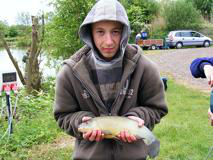

In [37]:
img = PIL.Image.open(img_fn)
img

In [38]:
import numpy
imga = numpy.array(img)

In [39]:
imga.shape

(160, 213, 3)

In [40]:
imga[:10,:10,0]

array([[251, 251, 251, 251, ..., 251, 251, 251, 251],
       [251, 251, 251, 251, ..., 251, 251, 251, 251],
       [251, 251, 251, 251, ..., 251, 251, 251, 251],
       [251, 251, 251, 251, ..., 251, 251, 251, 251],
       ...,
       [251, 251, 251, 251, ..., 251, 251, 251, 251],
       [251, 251, 251, 251, ..., 251, 251, 251, 251],
       [251, 251, 251, 251, ..., 251, 251, 251, 251],
       [251, 251, 251, 251, ..., 251, 251, 251, 251]], dtype=uint8)

In [41]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/') )

In [42]:
''.join(image_extensions)

'.crw.pnm.pcx.ppm.ras.djvu.jpe.xwd.psd.bmp.png.jpg.jng.tiff.svgz.jpm.pgm.tif.jp2.jpx.cpt.ief.jpeg.ico.cdt.xbm.art.orf.pat.erf.jpg2.svg.wbmp.pbm.nef.cr2.jpf.gif.djv.cdr.rgb.xpm'

In [43]:
#export
def setify(o): return o if isinstance(o,set) else set(listify(o))

In [44]:
#test_eq(setify('aa'), {'aa'})
#test_eq(setify(['aa',1]), {'aa',1})
#test_eq(setify(None), set())
#test_eq(setify(1), {1})
#test_eq(setify({1}), {1})

In [59]:
#export
def _get_files(p, fs, extensions=None):
  p = Path(p)
  res = [p/f for f in fs if not f.startswith('.')
          and ((not extensions) or f'.{f.split(".")[-1].lower()}' in  extensions)]
  return res

In [60]:
t = [o.name for o in os.scandir(path_tench)]
t = _get_files(path, t, extensions=image_extensions)
t[:3]

[PosixPath('/root/.fastai/data/imagenette2-160/n01440764_6301.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/n01440764_490.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/n01440764_27422.JPEG')]

In [61]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
  path = Path(path)
  extensions = setify(extensions)
  extensions = {e.lower() for e in extensions}
  if recurse:
    res = []
    for p,d,f in os.walk(path):
      if include is not None: d[:] = [o for o in d if o in include]
      else:                   d[:] = [o for o in d if not o.startswith('.')]
      res += _get_files(p,f,extensions)
    return res
  else:
    f = [o.name for o in os.scandir(path) if o.is_file()]
    return _get_files(path, f, extensions)

In [63]:
get_files(path_tench, image_extensions)[:5]

[PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764/n01440764_6301.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764/n01440764_490.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764/n01440764_27422.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764/n01440764_10120.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n01440764/n01440764_2920.JPEG')]

In [65]:
get_files(path, image_extensions, recurse=True)[:3]

[PosixPath('/root/.fastai/data/imagenette2-160/val/n02979186/n02979186_491.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n02979186/n02979186_9811.JPEG'),
 PosixPath('/root/.fastai/data/imagenette2-160/val/n02979186/n02979186_21472.JPEG')]

In [66]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [67]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

10 loops, best of 5: 79.1 ms per loop


**Prepare the model**